<a href="https://colab.research.google.com/github/majorquev/DBDC_202106_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase8/Clase8_2_Regresion_lineal_en_r_desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 8.2: Regresión lineal en R

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Jorge Arévalo Labarca<br>
**E-mail ayudante:** jorge.arevalol@usach.cl

## Especificación matemática del problema

Supongamos que interesa predecir el nivel de ventas de un determinado producto en función de los montos invertidos en distintos medios de publicidad (tv, radio, periódico).


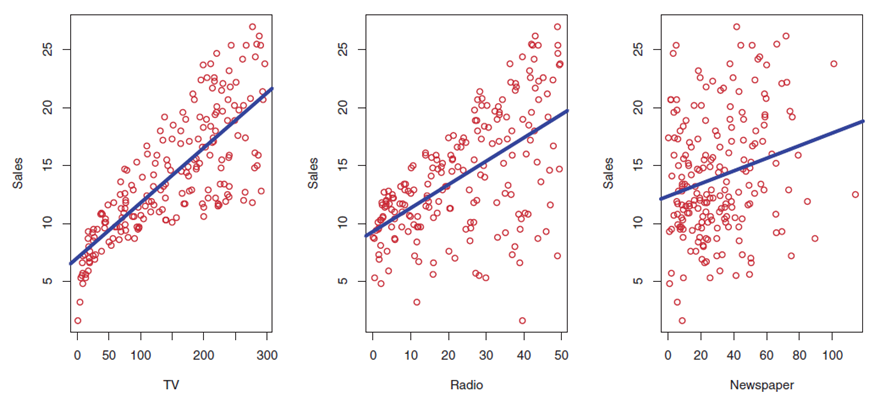

En general, el problema podría expresarse matemáticamente de la siguiente manera:
  \begin{align}
  Y &= f(X) + \epsilon  \ \ \ \ \ \ \ \ (1)
  \end{align}
  
Donde $X$ contiene a las variables explicativas (monto en tv, radio y periódico en el ejemplo), y $\epsilon$ es un error aleatorio no observable.
En esta especificación, f es una función desconocida y que buscamos estimar.
En términos simples, diremos que un modelo es de regresión, cuando en la expresión (1), la variable de interés a predecir, Y, es una variable numérica.

## Modelo de regresión lineal

Cuando el modelo $f$ a estimar, se asume como una función lineal (en los parámetros), diremos que (1) es un modelo de regresión lineal. En tal caso, el modelo matemático queda expresado de la siguiente manera:
   \begin{align}
   Y=\beta_0+\beta_1 X_1+\beta_2 X_2+…+\beta_p X_p  +\epsilon 
   \end{align}
Donde $\beta_i,i=0,. . .,p$ son los parámetros a estimar (estos parámetros definen al modelo), y $\epsilon$ es un error aleatorio no observable, típicamente siguiendo una distribución aleatoria normal $𝑁(0,\sigma^2)$.

### Nota:

Cuando los coeficientes a estimar (betas), o alguna función de ellos corresponde a una exresión no lineal, el modelo de regresión deja de serlo también. Por ejemplo, una especifiacción de la forma 
$Y = \beta_0 + \beta_1 \beta_2 X_1+ \beta_2 X_2 $ es un modelo no lineal, mientras que $Y = \beta_0 + \beta_1X_1+ \beta_2 X^3_2 $ sí lo es.

## Estimación de coeficientes

Tanto en R como en la mayoría de los softwares, la manera estándar de estimar los coeficientes en un modelo de regresión, es mediante la estimación vía mínimos cuadrados, donde se busca minimizar la suma residual:
$\sum\limits_{𝑖=1}^n (\hat{y}_i−y_i )^2 $
No entraremos en detalle, respecto de las bondades de esta estimación y que coincide con otros estimadores en el caso de la regresión lineal con errores normales.

![Imagen1.png](attachment:Imagen1.png)

Sin entrar en más detalles técnicos, veamos como podemos ajustar una regresión lineal en R.
Para ello podemos utilizar la función `lm()`, del paquete base. Esta recibe como argumento principal una formula y un datasets, del siguiente modo.<br>
<center>`lm(formula = y ~ x1 + x2 + ... + xp, data = dataset)`</center>
    <br>
Generemos nuestra primera regresión lineal con el dataset _Advertising_. El cual contiene las ventas totales de un producto y los montos invertidos en tres tipos de publicidad (tv, radio, periódico). En esta primera iteración consideremos solamente la variable newspapper.

In [1]:
library(ggplot2)
ventas <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202106_Programacion_en_R_para_ciencia_de_datos/main/Clases/Clase8/Advertising.csv",h=T)


In [2]:
head(ventas) # El X es in id de fila.
dim(ventas)

ventas$X <- NULL

,X,TV,radio,newspaper,sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


[1] 200   5

In [3]:
head(ventas)

,TV,radio,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


Aquí, estamos asumiento que el modelo es $Y = \beta_0 + \beta_1X_1+ \epsilon$, donde $X_1$ corresponde a la variable _newspaper_ e  $Y$ a _sales_ 

In [4]:
# Creamos nuestro primer modelo lineal considerando newspaper.
mod1 <- lm(sales ~ newspaper, data = ventas)

In [6]:
# Clase y resumen del modelo
class(mod1)
str(mod1)

[1] "lm"

List of 12
 $ coefficients : Named num [1:2] 12.3514 0.0547
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "newspaper"
 $ residuals    : Named num [1:200] 5.96 -4.42 -6.84 2.95 -2.65 ...
  ..- attr(*, "names")= chr [1:200] "1" "2" "3" "4" ...
 $ effects      : Named num [1:200] -198.31 -16.8 -6.69 2.94 -2.66 ...
  ..- attr(*, "names")= chr [1:200] "(Intercept)" "newspaper" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:200] 16.1 14.8 16.1 15.6 15.5 ...
  ..- attr(*, "names")= chr [1:200] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:200, 1:2] -14.1421 0.0707 0.0707 0.0707 0.0707 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:200] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "newspaper"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.07 1.04
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 198


In [7]:
summary(mod1)


Call:
lm(formula = sales ~ newspaper, data = ventas)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


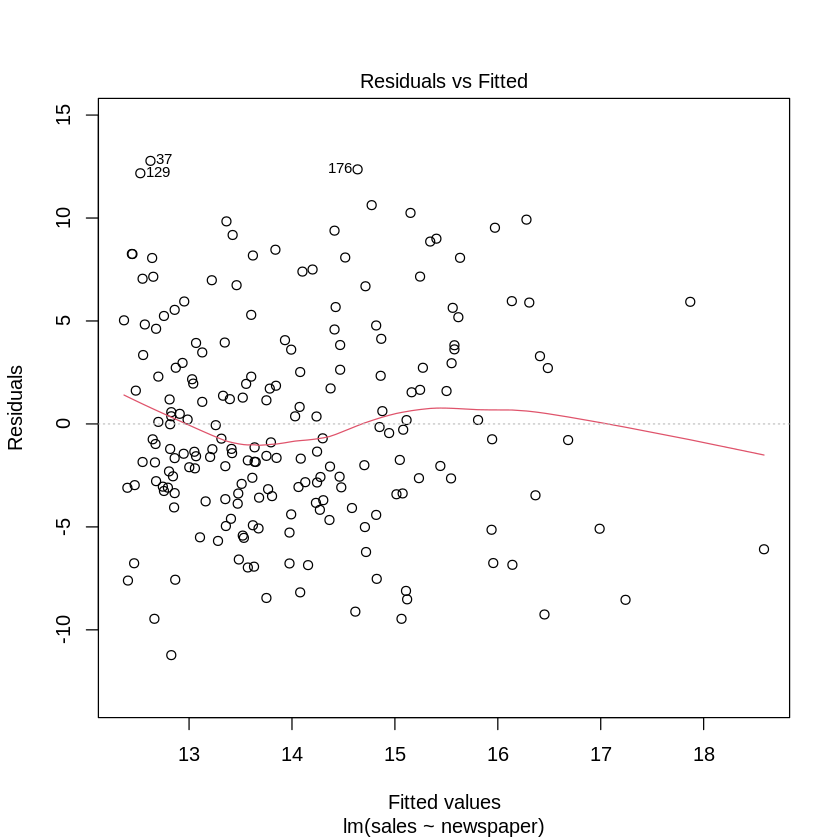

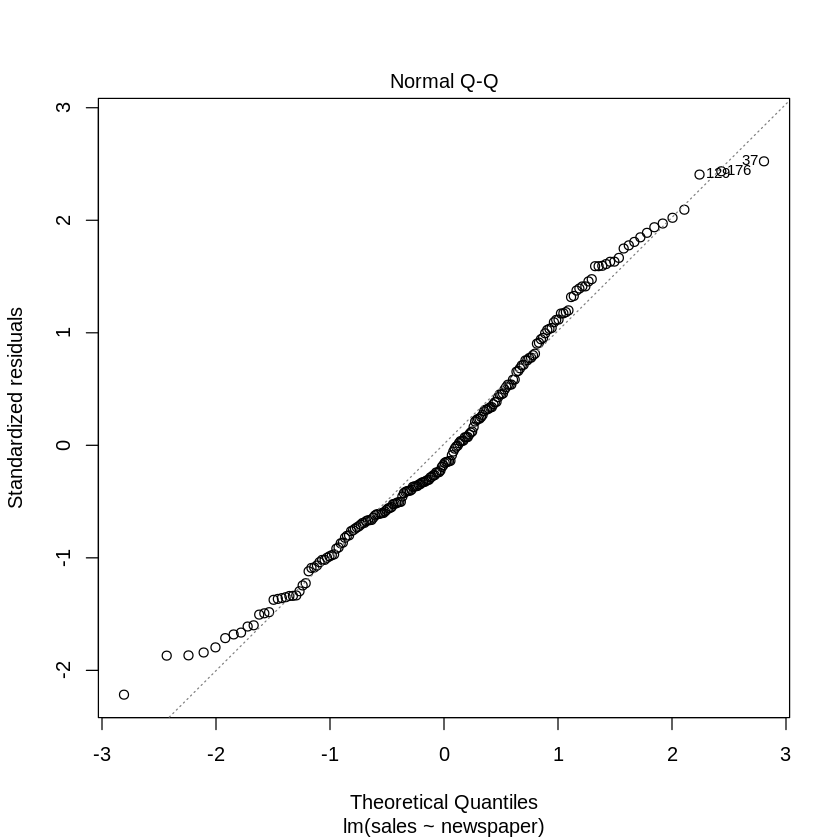

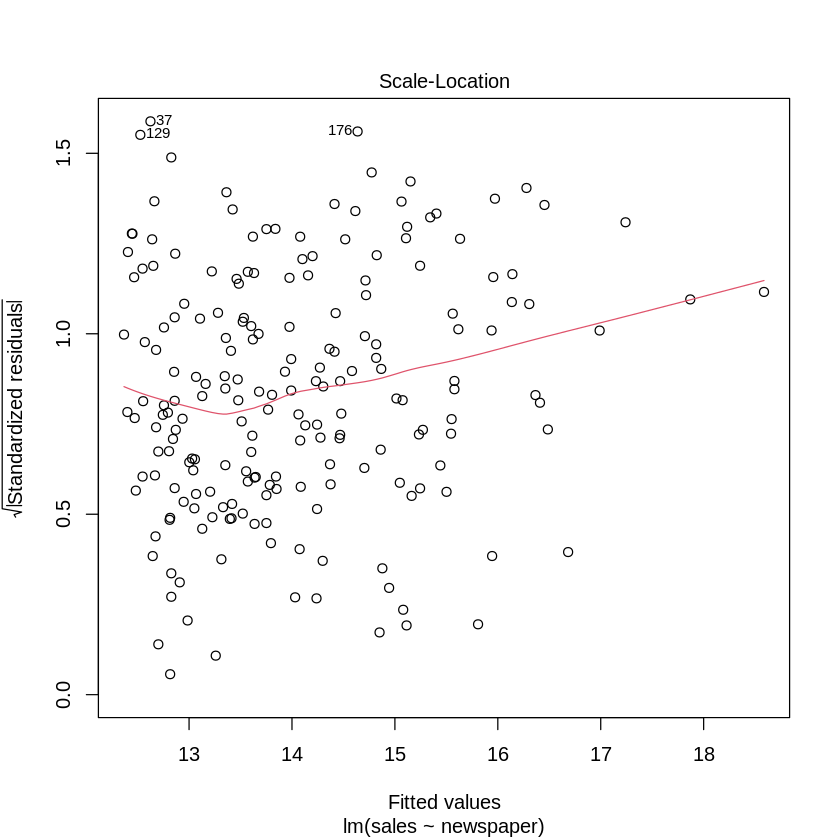

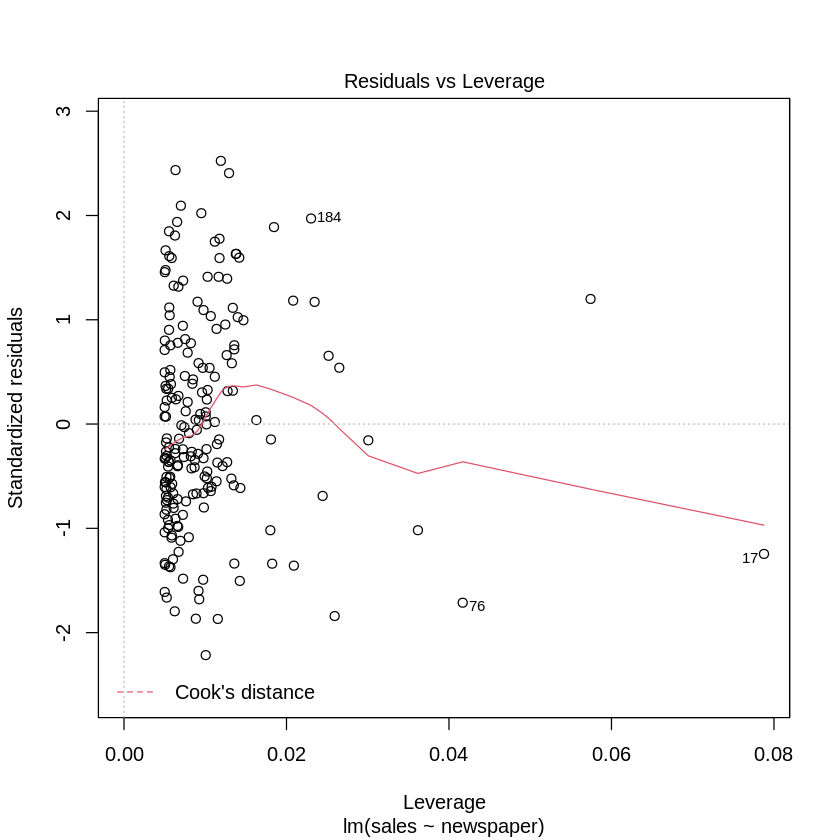

In [8]:
plot(mod1)

In [11]:
mod1$coefficients
mod1$residuals
mod1$fitted.values

1        2        3        4        5        6        7        8 
16.13617 14.81807 16.14164 15.55095 15.54548 16.45339 13.63669 12.98585 
       9       10       11       12       13       14       15       16 
12.40610 13.51090 13.67498 12.57018 15.95568 12.74520 14.86729 15.24467 
      17       18       19       20       21       22       23       24 
18.58642 15.40328 13.35229 13.39605 15.27202 13.63669 15.06418 13.78437 
      25       26       27       28       29       30       31       32 
13.35229 13.41792 13.04054 13.60388 13.60388 14.58289 14.71415 14.46256 
      33       34       35       36       37       38       39       40 
13.99220 12.36781 12.75614 12.81630 12.62487 14.85088 14.27113 14.10159 
      41       42       43       44       45       46       47       48 
14.07971 14.46803 12.44985 13.79530 14.71962 14.07424 14.30395 13.36323 
      49       50       51       52       53       54       55       56 
15.08059 14.36411 14.24379 12.54830 14.51725 15.56189 13.22103 15.63299 
      57       58       59       60       61       62       63       64 
14.61570 13.25931 14.41334 12.86005 13.52184 15.34312 13.84453 12.81083 
      65       66       67       68       69       70       71       72 
13.93204 12.40063 12.47173 12.90928 12.95303 13.83906 14.46803 14.08518 
      73       74       75       76       77       78       79       80 
13.40698 14.06330 13.06789 17.24097 13.48355 13.12805 12.86552 13.61482 
      81       82       83       84       85       86       87       88 
13.57106 14.36958 14.12893 14.29848 14.20003 15.94474 13.22650 15.80801 
      89       90       91       92       93       94       95       96 
16.36588 15.16263 12.86005 14.15628 15.57830 16.30572 12.94756 15.24467 
      97       98       99      100      101      102      103      104 
12.67410 13.55466 15.15169 14.86182 15.07512 17.86994 13.52184 13.33041 
     105      106      107      108      109      110      111      112 
12.64128 15.57830 13.97579 13.62029 13.75155 12.65222 15.44157 13.62029 
     113      114      115      116      117      118      119      120 
12.48267 12.93662 14.23832 15.23373 13.75155 13.16086 16.68310 13.57106 
     121      122      123      124      125      126      127      128 
14.87823 15.10794 13.20462 13.02960 16.40963 13.76796 15.11888 12.85458 
     129      130      131      132      133      134      135      136 
12.52642 14.70868 12.82724 14.70321 12.46626 14.81807 15.93927 12.81630 
     137      138      139      140      141      142      143      144 
12.86005 15.61659 13.47262 12.44439 13.05695 16.48621 14.42428 14.23285 
     145      146      147      148      149      150      151      152 
14.47897 12.84364 12.82724 14.77431 13.00225 13.47808 14.37505 15.01496 
     153      154      155      156      157      158      159      160 
13.12805 14.41334 12.87099 12.66316 15.11341 13.68045 14.82354 14.24379 
     161      162      163      164      165      166      167      168 
14.03049 15.04778 13.75155 12.75614 12.64675 16.98938 13.53278 13.41245 
     169      170      171      172      173      174      175      176 
15.50173 12.70144 13.35776 14.94386 13.28119 13.05148 13.06789 14.63758 
     177      178      179      180      181      182      183      184 
13.46168 14.27660 13.64763 13.31401 12.80536 13.85000 13.97579 16.27837 
     185      186      187      188      189      190      191      192 
13.99220 13.42339 13.80624 13.34682 12.55377 13.63123 12.66863 12.67957 
     193      194      195      196      197      198      199      200 
14.07971 12.54830 12.67957 13.10617 12.79442 12.70144 15.97209 12.82724

Del resumen amterior podemos observar la siguiente información

   * **Residuals:** Muestra estadísticos de posición de los residuos obtenidos.
   * **Coefficients:** Muestra los valores de los coeficientes estimados del modelo, junto con su error estándar ($\sqrt{\hat{Var}(\hat{\beta}_i)}$), el valor del estadístico *t*,  con el cual es posible evaluar la  significacncia del parámetro estimado, y el valor-p asociado a dicha prueba.
   * **Residual standar error:** Error standar del ajuste. Corresponde a la raiz cuadrada del error cuadrático medio (penalizado por los grados de libertad).
   * **Multuple R-squared:** Corresponde al porcentaje de la varianza explicada por el modelo.
   * **Adjusted R-squared:** Corresponde a una versión penalizada del $R^2$. Toma en cuenta posibles sobre ajustes del modelo.
   * **F-statistic:** Estadistico asociado al test F de Ficsher para evaluar la significancia del modelo. 

In [12]:
names(ventas)

[1] "TV"        "radio"     "newspaper" "sales"

In [13]:
# Podemos generar un nuevo modelo sólo con la variables TV
mod2 <- lm(sales ~ TV,data =ventas)

In [14]:
summary(mod2)


Call:
lm(formula = sales ~ TV, data = ventas)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [15]:
# función predict() para realizar predicciones
# Si no seingresan nuevos datos, predict genera las predicciones sobre los valores con los que fue entrenado el modelo.
new <- data.frame(TV =c(100, 120, 200))
new

TV
<dbl>
100
120
200


In [16]:
predict(mod2, new)

1        2        3 
11.78626 12.73699 16.53992

In [17]:
predict(mod2)  # Sin indicarle nueva data, retorna las predicciones sobre el dataset con el cual fue ajustada la regresión  lineal

1         2         3         4         5         6         7         8 
17.970775  9.147974  7.850224 14.234395 15.627218  7.446162  9.765950 12.746498 
        9        10        11        12        13        14        15        16 
 7.441409 16.530414 10.174765 17.238710  8.163966 11.667416 16.734822 16.321253 
       17        18        19        20        21        22        23        24 
10.255578 20.409404 10.322129 14.034741 17.414596 18.317792  7.660077 17.885209 
       25        26        27        28        29        30        31        32 
 9.994126 19.529976 13.825579 18.446141 18.859710 10.388680 20.956076 12.399480 
       33        34        35        36        37        38        39        40 
11.653155 19.658325 11.581850 20.851495 19.720123 10.583581  9.081423 17.870948 
       41        42        43        44        45        46        47        48 
16.658763 15.446579 20.989351 16.867924  8.225763 15.356259 11.296630 18.436634 
       49        50        51        52        53        54        55        56 
17.832918 10.212795 16.530414 11.805272 17.319523 15.712784 19.520469 16.487631 
       57        58        59        60        61        62        63        64 
 7.379611 13.507084 17.053317 17.048564  9.575804 19.453918 18.408112 11.914607 
       65        66        67        68        69        70        71        72 
13.264647 10.312622  8.529998 13.654448 18.317792 17.338537 16.497139 12.252117 
       73        74        75        76        77        78        79        80 
 8.306576 13.183835 17.176913  7.835963  8.339851 12.760759  7.289291 12.546844 
       81        82        83        84        85        86        87        88 
10.664393 18.431880 10.612103 10.284100 17.181666 16.216672 10.659639 12.294900 
       89        90        91        92        93        94        95        96 
11.230079 12.252117 13.416764  8.392141 17.381320 18.959537 12.138029 14.795327 
       97        98        99       100       101       102       103       104 
16.425834 15.822118 20.803958 13.459547 17.604742 21.122454 20.352360 15.964728 
      105       106       107       108       109       110       111       112 
18.355821 13.587896  8.221010 11.329906  7.655324 19.173452 17.766367 18.522200 
      113       114       115       116       117       118       119       120 
15.384781 16.996273 10.749959 10.602595 13.649694 10.664393 13.007949  7.954804 
      121       122       123       124       125       126       127       128 
13.749521  7.926282 17.680801 12.884354 17.942253 11.177789  7.403379 10.845032 
      129       130       131       132       133       134       135       136 
17.504915  9.865777  7.065869 19.639311  7.431901 17.481147  8.786696  9.328613 
      137       138       139       140       141       142       143       144 
 8.249532 20.043372  9.076669 15.822118 10.521783 16.240441 17.514423 12.004926 
      145       146       147       148       149       150       151       152 
11.605618 13.701984 18.446141 18.593505  8.838986  9.157481 20.376129 12.784527 
      153       154       155       156       157       158       159       160 
16.425834 15.175620 15.959975  7.227494 11.496284 14.153582  7.588772 13.293169 
      161       162       163       164       165       166       167       168 
15.232664 11.106484 15.988497 14.804834 12.603888 18.179936  7.883499 16.863171 
      169       170       171       172       173       174       175       176 
17.271986 20.547260  9.409426 14.852371  7.964312 15.037764 17.604742 20.195489 
      177       178       179       180       181       182       183       184 
18.840695 15.123330 20.185982 14.904661 14.476831 17.419349  9.704153 20.704131 
      185       186       187       188       189       190       191       192 
19.097393 16.777605 13.663955 16.116846 20.628073  7.921529  8.910291 10.621610 
      193       194       195       196       197       198       199       200 
 7.850224 14.961705 14.148829  8.848493

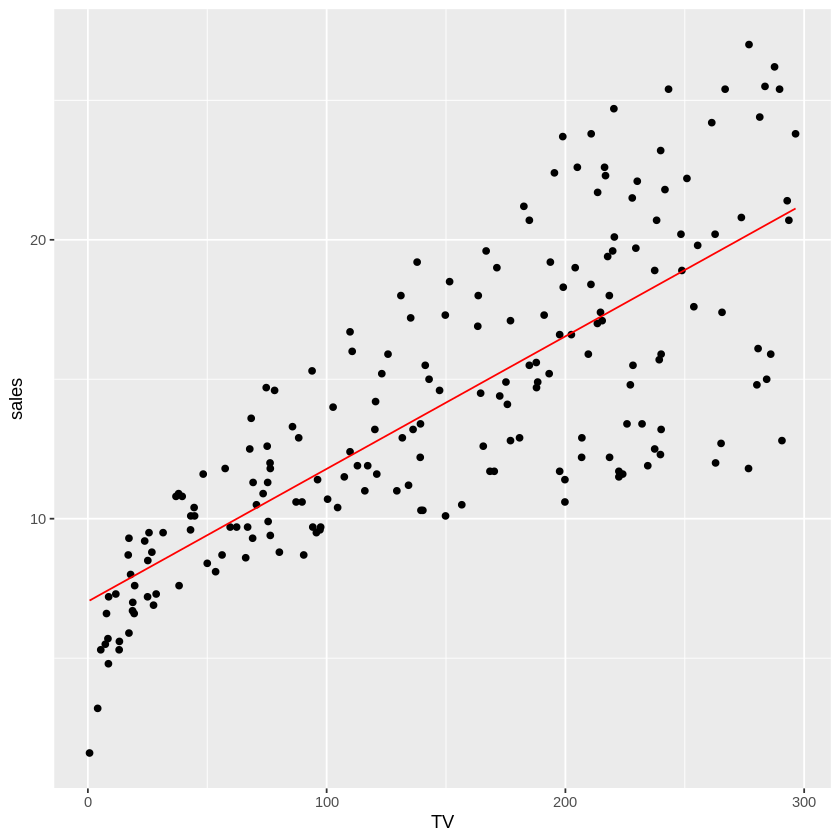

In [23]:
# ¿Cómo podemos agregar la recta predicha al gráfico de de dispersión?
ggplot(ventas) +
  aes(x = TV, y = sales) + 
  geom_point() + 
  geom_line(aes(x = TV, y = predict(mod2,ventas["TV"])), color = "red")  
  
  


In [24]:
# Si incluimos las covariables restantes?
mod3 <- lm(sales ~ TV + newspaper + radio, data  = ventas) 

In [25]:
summary(mod3)


Call:
lm(formula = sales ~ TV + newspaper + radio, data = ventas)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
radio        0.188530   0.008611  21.893   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


## Interpretación de los coeficientes
Uno de los aspectos más característicos de la _regresión lineal_, son los coeficientes que determinan el modelo lineal, debido a la interpretación de estos.
Suponiendo un modelo de la forma 
$$Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + \dots + \beta_pX_{ip}+ \epsilon_i , \text{ donde } \epsilon_i \sim N(0 ,\sigma^2)$$

Es posible mostrar que $\beta_k$ representa a la tasa de cambio de del valor esperado de $Y$ respecto de $X_k$, cuándo esta última aumenta en una unidad.

In [ ]:
# Es este último modelo mejor?
# Si se aumenta en una unidad el monto invertido en TV, 
#¿Cuál es el aumento esperado en las ventas ?

0.045765 #un. de venta

In [26]:
# utilice la función confint() para obtener intervalos de confianza para los parámetros estimados.

confint(mod2)

,2.5 %,97.5 %
(Intercept),6.12971927,7.93546783
TV,0.04223072,0.05284256
